In [44]:
import os
import mysql.connector as mysqlc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hostname = %env MYSQL_HOST
username = %env MYSQL_USER
password = %env MYSQL_PASSWORD
database = %env MYSQL_DB

conn = mysqlc.connect( host=hostname, user=username, passwd=password, db=database )
# Check if connection was successful
if (conn.is_connected()):
    # Carry out normal procedure
    print ("Connection successful")
else:
    # Terminate
    print ("Connection unsuccessful")
    

Connection successful


In [45]:
mycursor = conn.cursor()

mycursor.execute("SELECT * FROM casos_covid")

data = mycursor.fetchall()

ciudades = []
edades = []
sexos= []
estados= []

ranks=[]

for row in data:
    ciudades.append(row[1])
    edades.append(int(row[2]))
    sexos.append(row[3])
    estados.append(row[4])
    ranks.append(row[0])
    
new_data = {'Ciudad': ciudades,'Edad': edades, 'Sexo': sexos, 'Estado': estados}
df = pd.DataFrame(new_data, index=ranks)

<AxesSubplot:>

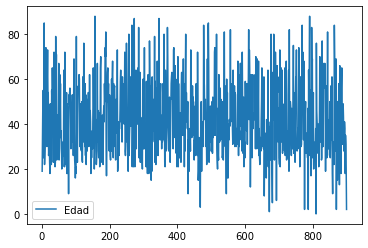

In [46]:
df.head()
df.plot()

<AxesSubplot:ylabel='Frequency'>

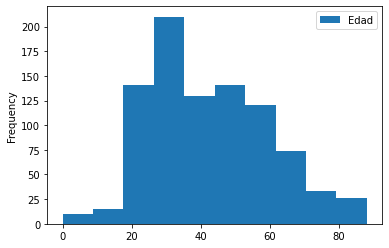

In [47]:
df.plot.hist("ciudad")

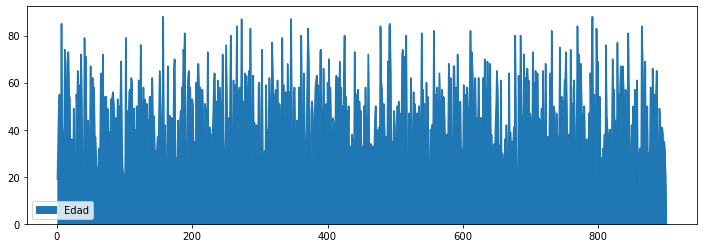

In [48]:
df.plot.area(figsize=(12, 4), subplots=True)

conn.close()